# Анализ компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Выявим определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**План выполнения работы:**
1. Открытие файла и изучение общей информации.
2. Подготовка данных
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

# **1. Открытие файла и изучение общей информации**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns
from scipy import stats as st

Открываем файл и изучаем таблицу.

In [2]:
data_games = pd.read_csv('/datasets/games.csv')
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучаем общую информацию по предоставленным данным.

In [3]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обращаем внимание на тип данных object в столбце User_Score. В предобработке будем с этим разбираться.

Проверяем данные на наличие дубликатов.

In [4]:
data_games.duplicated().sum()

0

Проверяем количество пропусков.

In [5]:
data_games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:**
1. Данные изучены
2. Дубликаты не обнаружены
3. Необходимы замены типов данных в столбцах Year_of_Release (float на int) и в User_Score (object на float)
4. Названия столбцов для удобства работы необходимо привести к нижнему регистру
5. Требуется анализ и работа с пропусками

# 2. Подготовка данных

Приведём названия столбцов к нижнему регистру.

In [6]:
data_games.columns = map(str.lower, data_games.columns)
data_games.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверим пропуски в столбце year_of_release

In [7]:
data_games['year_of_release'].isna().sum()

269

Учитывая, что в таблице 16715 значений, эта цифра сравнительно мала. Полагаем, что эти строки можно удалить без потери ценной информации, и это не повлияет на дальнейший ход исследования.

In [8]:
data_games = data_games.dropna(subset = ['year_of_release'])
data_games['year_of_release'].isna().sum()

0

Пропущенные значения ликвидированы, теперь можно привести столбец к целочисленному типу.

In [9]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверяем, почему в столбце user_score тип данных object.

In [10]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обращаем внимание на значение 'tbd' (To Be Determined), обозначающее "будет определено". Данный аспект можно приравнять к отсутсвующим значениям, так как на данный момент мы этой информацией не обладаем.

In [11]:
data_games['user_score'].isna().sum()

6607

In [12]:
data_games.loc[data_games['user_score'] == "tbd", 'user_score'] = np.nan
data_games.loc[data_games['user_score'] == "nan", 'user_score'] = np.nan
data_games['user_score'].isna().sum()

8983

In [13]:
data_games['user_score'] = data_games['user_score'].astype('float')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Получаем на выходе довольно много пропусков, но на данном этапе не обладаем информацией для их заполнения и оставляем их, как есть.

Проверяем пропущенные значения по другим столбцам.

В столбце с названием игр всего два пропущенных значения. Данные без названий не несут в себе для нас никакой нужной информации, удаляем эти строки без ущерба для дальнейшего анализа. 

In [14]:
data_games['name'].isna().sum()

2

In [15]:
data_games = data_games.dropna(subset = ['name'])
data_games['name'].isna().sum()

0

Большое количество пропусков видим в столбце critic_score, но информации, от которой можно было бы отталкиваться при заполнении них нет, поэтому оставим их в изначальном виде. 

In [16]:
data_games['critic_score'].isna().sum()

8461

**Подсчёт суммарных продаж во всех регионах**


Создаём новый столбец, в котором складываем продажи из всех регионов.

In [17]:
data_games['all_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Обрабатываем пропущенные значения в рейтинге.

In [18]:
data_games['rating']=data_games['rating'].fillna('undefined')
data_games['rating'].isnull().sum()

0

**Вывод** 

1. Обнаружены пропущенные значения, в годе выпуска по возможности обработаны, в случаях, когда данные не несут в себе прикладной информации, удалены
2. Названия столбцов для удобства дальнейшей работы приведены к нижнему регистру
3. Определено значение tbd и заменено на NaN
4. Подсчитаны суммарные продажи во всех регионах и сохранены в новый столбец

# 3. Исследовательский анализ данных


Создаём сводную таблицу, чтобы посмотреть, сколько игр выпускалось в разные годы.

In [19]:
data_games_pivot = data_games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
data_games_pivot

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:title={'center':'Выпуск игр'}, xlabel='year_of_release'>

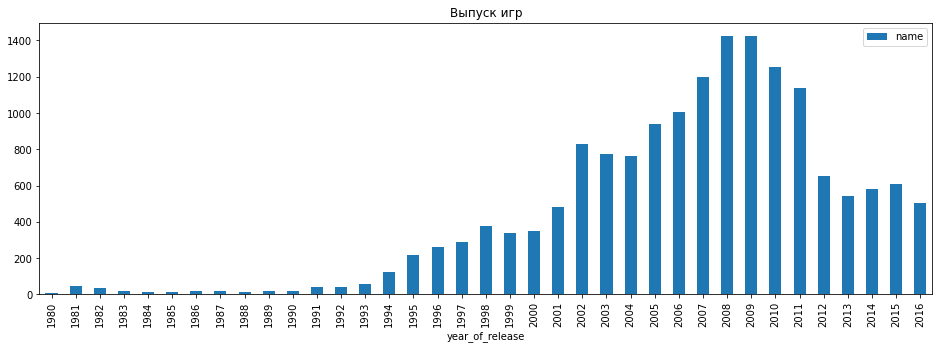

In [20]:
data_games_pivot.plot(kind='bar', title = 'Выпуск игр', figsize=(16,5))

Обращаем внимание на то, что до 1994 года выпускалось очень мало игр, и эти данные можно не учитывать при дальнейшем анализе.


Просматриваем суммарные продажи по платформам, выбираем платформы с наибольшими суммарными продажами.

In [21]:
data_games_sales = data_games.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
data_games_sales.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:title={'center':'Cуммарные продажи'}, xlabel='platform'>

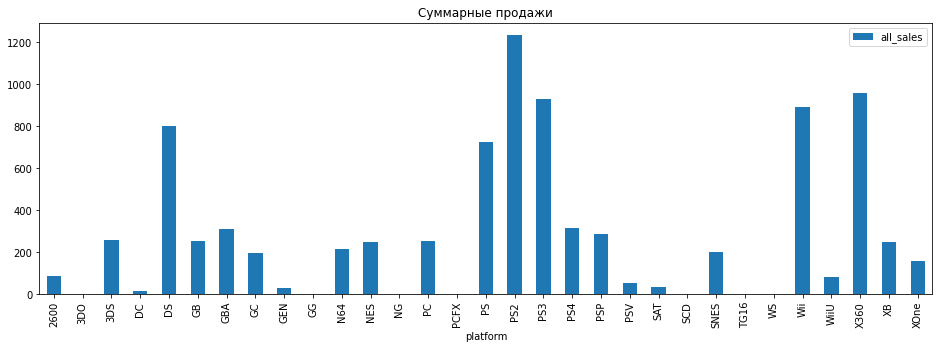

In [22]:
data_games_sales.plot(kind='bar', title = 'Cуммарные продажи', figsize=(16,5))

Выделяем PS, DS, Wii, PS3, X360, PS2

In [23]:
PS_data = data_games.query('platform== "PS"')
DS_data = data_games.query('platform== "DS"')
Wii_data = data_games.query('platform== "Wii"')
PS3_data = data_games.query('platform== "PS3"')
X360_data = data_games.query('platform== "X360"')
PS2_data = data_games.query('platform== "PS2"')


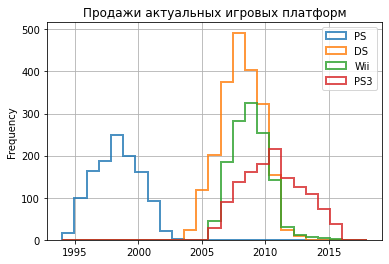

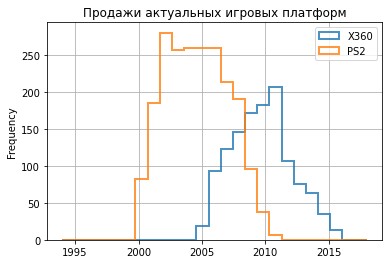

In [24]:
ax = PS_data.plot(
    y = 'year_of_release',
    kind='hist',
    histtype='step',
    range=(1994, 2018),
    bins=25,
    linewidth=2,
    alpha=0.8,
    label='PS')

ax_1=DS_data.plot(
    y='year_of_release',
    kind='hist',
    histtype='step',
    range=(1994, 2018),
    bins=25,
    linewidth=2,
    alpha=0.8,
    label='DS',
    ax=ax,
    grid=True,
    legend=True,
    title = ''
) 
ax_2=Wii_data.plot(
    y='year_of_release',
    kind='hist',
    histtype='step',
    range=(1994, 2018),
    bins=25,
    linewidth=2,
    alpha=0.8,
    label='Wii',
    ax=ax_1,
    grid=True,
    legend=True,
    title = '')


ax_3 = PS3_data.plot(
    y='year_of_release',
    kind='hist',
    histtype='step',
    range=(1994, 2018),
    bins=25,
    linewidth=2,
    alpha=0.8,
    label='PS3',
    ax=ax_2,
    grid=True,
    legend=True,
    title = 'Продажи актуальных игровых платформ')

ax_4 = X360_data.plot(
    y='year_of_release',
    kind='hist',
    histtype='step',
    range=(1994, 2018),
    bins=25,
    linewidth=2,
    alpha=0.8,
    label='X360',
    grid=True,
    legend=True,
    title = '')

ax_5 = PS2_data.plot(
    y='year_of_release',
    kind='hist',
    histtype='step',
    range=(1994, 2018),
    bins=25,
    linewidth=2,
    alpha=0.8,
    label='PS2',
    ax=ax_4,
    grid=True,
    legend=True,
    title = 'Продажи актуальных игровых платформ')

По данной гистограмме, построенной по платформам с наибольшими суммарными продажами, делаем вывод, что характерным сроком появления новых и исчезания старых платформ является промежуток от 5 до 10 лет.

Предполагаем, что прогноз на 2017 год могут построить данные с 2013 по 2016 год. Создаём таблицу.

In [25]:
games_new = data_games.query('year_of_release>=2013')

games_new.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,undefined,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [26]:
games_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Обращаем внимание, что некоторые платформы обновлялись, поэтому имеет смысл для дальнейшего анализа взять последние версии: PS4 вместо PS3, XOne вместо X360, WiiU вместо Wii, 3DS вместо DS.

In [27]:
final_data = data_games.loc[
    data_games['platform'].isin(["PS4", "3DS", "XOne", "WiiU", "PC"])
]
final_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68


Создаём срезы по отдельным платформам для построения графика

In [28]:
PS4_data = games_new.query('platform== "PS4"')
DS3_data = games_new.query('platform== "3DS"')
WiiU_data = games_new.query('platform== "WiiU"')
XOne_data = games_new.query('platform== "X360"')
PC_data = games_new.query('platform== "PC"')

<AxesSubplot:xlabel='year_of_release'>

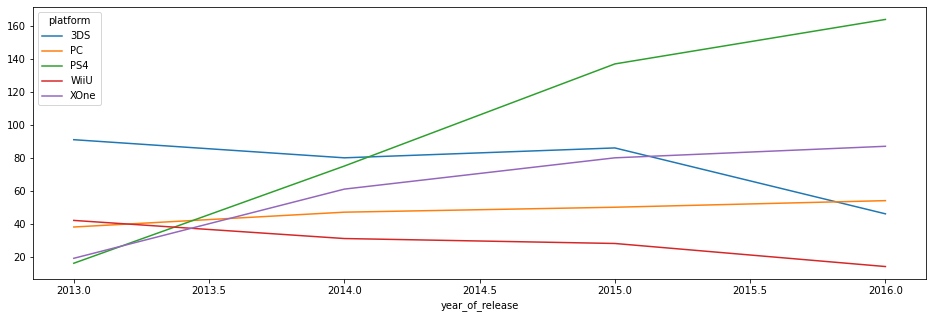

In [29]:
games_new.loc[
    data_games['platform'].isin(["PS4", "3DS", "XOne", "WiiU", "PC"])
].pivot_table(
    index='year_of_release',
    columns='platform',
    values='genre',
    aggfunc='count'
).plot(figsize=(16,5))

По данной гистограмме можем сделать следующие выводы:
1. Продажи стабильно растут у платформ PS и PC
3. Продажи  WiiU и 3DS держат неплохие позиции.
4. Потенциально прибыльными платформами по статистике последнего года являются PS4, XOne, PC 

Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Глобальные продажи')

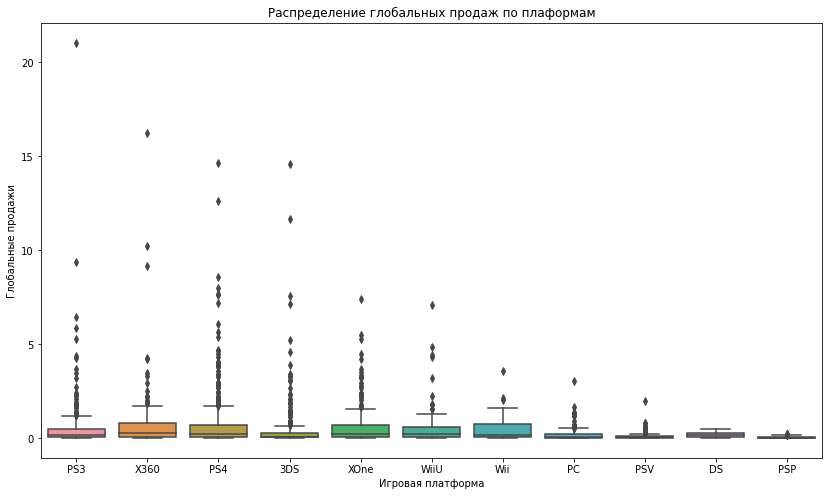

In [30]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(data=games_new, y="all_sales", x='platform')
sns.set(style="ticks")
ax.set_title('Распределение глобальных продаж по плаформам')
ax.set_xlabel('Игровая платформа')
ax.set_ylabel('Глобальные продажи')


Вывод по графику:
Есть достаточно большое количество игр с очень высокими показателями продажам по сравнению со средними значениями.

Рассмотрим, как влияют на продажи внутри одной популярной платформы (возьмём PS4) отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Делаем срез по необходимой платформе

In [31]:
PS4 =games_new.loc[(games_new['platform'] == 'PS4')]
PS4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


Строим диаграммы рассеивания

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Влияние отзывов критиков (PS4)'}, xlabel='critic_score', ylabel='all_sales'>

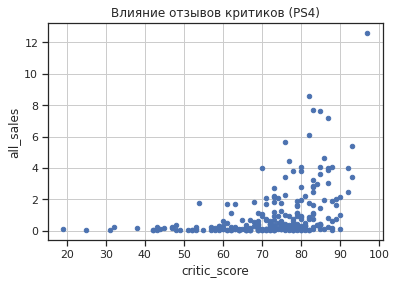

In [32]:
PS4.plot(y='all_sales',
    x='critic_score',
    kind='scatter',
    grid=True,
    legend=True,
    title = 'Влияние отзывов критиков (PS4)'
)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Влияние отзывов пользователей (PS4)'}, xlabel='user_score', ylabel='all_sales'>

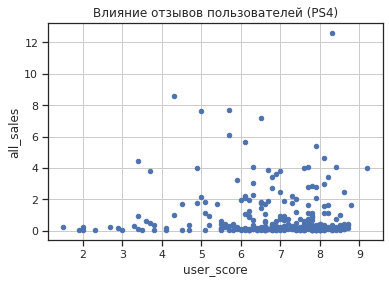

In [33]:
PS4.plot(y='all_sales',
    x='user_score',
    kind='scatter',
    grid=True,
    legend=True,
    title = 'Влияние отзывов пользователей (PS4)'
)



По данным диаграммам видно, что на продажи влияют отзывы критиков больше, чем отзывы пользователей.

Считаем корреляцию между отзывами и продажами.

In [34]:
print('Корреляция между отзывами критиков и продажами (PS4):', PS4['all_sales'].corr(PS4['critic_score']))
print('Корреляция между отзывами пользователей и продажами (PS4):', PS4['all_sales'].corr(PS4['user_score']))

Корреляция между отзывами критиков и продажами (PS4): 0.406567902061781
Корреляция между отзывами пользователей и продажами (PS4): -0.031957110204556376


In [35]:
final_data.groupby(['platform'])[['all_sales','critic_score','user_score']].agg('corr').reset_index().query('level_1 == "all_sales"')

,platform,level_1,all_sales,critic_score,user_score
0,3DS,all_sales,1.0,0.348740,0.222078
3,PC,all_sales,1.0,0.257395,0.012905
6,PS4,all_sales,1.0,0.406568,-0.031957
9,WiiU,all_sales,1.0,0.348380,0.400219
12,XOne,all_sales,1.0,0.416998,-0.068925


**Вывод**
1. Наблюдается корреляция между отзывами критиков и продажами на всех платформах
2. У платформы WiiU корреляция выше между отзывами пользователей: можно сделать вывод, что пользователи этой платформы перед покупкой интересуются отзывами других пользователей.
3. Продажи платформы 3DS не зависят от отзывов
4. В общем и целом наблюдается тенденция зависимости от отзывов критиков: предполагаем, что на них при покупке ориентируются больше всего.

Посмотрим на общее распределение игр по жанрам. 

In [36]:
genres = games_new.groupby('genre')['all_sales'].agg('median').sort_values(ascending=False)
genres              

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: all_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

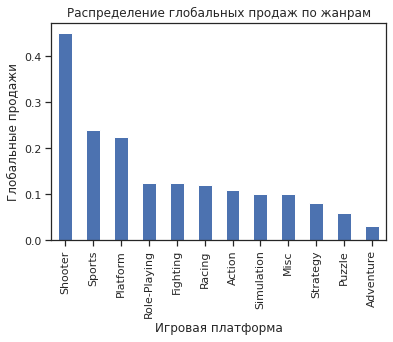

In [37]:
ax =  genres.plot.bar() 
ax.set_title('Распределение глобальных продаж по жанрам')
ax.set_xlabel('Игровая платформа')
ax.set_ylabel('Глобальные продажи')

По сгруппированной таблице и графику можем сделать следующие выводы:
1. В топе по продажам такие жанры, как: Shooter, Sports, Platform
2. Самыми низкими по продажам оказались Strategy, Puzzle, Adventure
3. По предыдущим двум пунктам можно сделать вывод, какие жанры стоит продвигать для увеличения продаж.

**Общий вывод по исследовательскому анализу**
1. Выявили, сколько игр выпускалось за разные годы. Обратили внимание на то, что до 1994 года выпускалось очень мало игр.
2. Проверили, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами. Выявили характерный срок появления новых и исчезновения старых платформ: от 5 до 10 лет.
3. Выявили актуальный период для исследования: начиная с 2013 года.
4. Определили потенциально прибыльные платформы по статистике последнего года: PS4, XOne, PC
5. Определили тенденцию зависимости от отзывов критиков: предполагаем, что на них при покупке ориентируются больше всего. Для этого сравнили зависимость от отзывов платформы PS4 и всех других платформ.
6. Определили топ жанров: Shooter, Sports, Platform.  Эти жанры стоит продвигать для увеличения продаж.



# 4. Составление портрета пользователя каждого региона

Делаем таблицу с суммами продаж по регионам для каждой платформы. Используем для этого таблицу с данными с 2013 по 2016 год.

In [38]:
data_platforms = games_new.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum') 
data_platforms.head(10)

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.29
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


Сортируем таблицу по данным для Северной Америки, выводим первые 5 значений. Они и будут самыми популярными платформами для этого региона. 

In [39]:
data_platforms.sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,0.34
X360,81.66,42.52,0.51
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81


<AxesSubplot:ylabel='na_sales'>

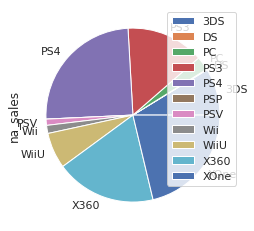

In [40]:
data_platforms.plot(kind = 'pie', y = 'na_sales')

То же самое делаем по данным для Европы

In [41]:
data_platforms.sort_values(by = 'eu_sales', ascending = False).head(5)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
PS3,63.50,67.81,23.35
XOne,93.12,51.59,0.34
X360,81.66,42.52,0.51
3DS,38.20,30.96,67.81


И для Японии

<AxesSubplot:ylabel='eu_sales'>

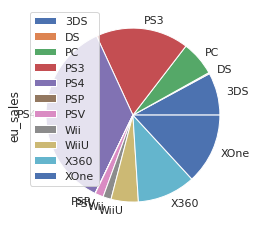

In [42]:
data_platforms.plot(kind = 'pie', y = 'eu_sales')

In [43]:
data_platforms.sort_values(by = 'jp_sales', ascending = False).head(5)


,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
PS3,63.50,67.81,23.35
PSV,5.04,6.10,18.59
PS4,108.74,141.09,15.96
WiiU,29.21,19.85,10.88


<AxesSubplot:ylabel='jp_sales'>

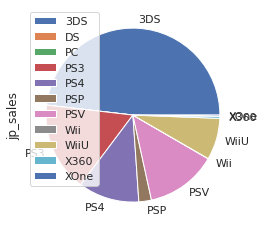

In [44]:
data_platforms.plot(kind = 'pie', y = 'jp_sales')

**Вывод**

1. В Северной Америке и Европе самыми популярными платформами являются разные поколения PS, Xbox 
3. В Японии помимо PS популярны также платформы DS

Делаем таблицу с суммами продаж по регионам для каждого жанра. Используем для этого таблицу с данными с 2013 по 2016 год.

In [45]:
data_genres = games_new.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum') 
data_genres.head(10)

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Adventure,7.14,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Puzzle,0.83,1.00,1.18
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61


Сортируем таблицу по данным для Северной Америки, выводим первые 5 значений. Они и будут самыми популярными жанрами для этого региона. 

In [46]:
data_genres.sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,5.41
Role-Playing,46.40,36.97,51.04
Misc,27.49,20.04,9.20


Сортируем таблицу по данным для Европы

In [47]:
data_genres.sort_values(by = 'eu_sales', ascending = False).head(5)

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,5.41
Role-Playing,46.40,36.97,51.04
Racing,12.96,20.19,2.30


Сортируем таблицу по данным для Японии

In [48]:
data_genres.sort_values(by = 'jp_sales', ascending = False).head(5)

,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,46.40,36.97,51.04
Action,126.05,118.13,40.49
Misc,27.49,20.04,9.20
Fighting,15.55,8.55,7.65
Shooter,109.74,87.86,6.61


**Вывод**

1. В Северной Америке и Европе самыми популярными жанрами являются Action, Shooter, Sports, Role-Playing
2. В Японии помимо Role-Playing и  Action также популярны Fighting и Misc

<AxesSubplot:xlabel='genre'>

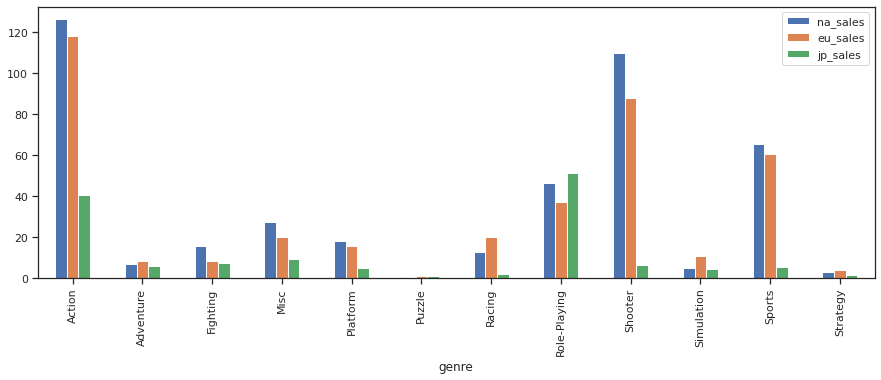

In [49]:
data_genres.plot(kind='bar', figsize=(15,5))

Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [50]:
data_rating = games_new.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum') 
data_rating.head(10)

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59
undefined,89.42,78.91,85.05


Расшифруем значения:

Е - Everyone (для всех)

E10+ - Everyone 10 and older (для всех старше 10 лет)

EC - Early childhood (для детей)

M - Mature (для взрослых)

RP - Rating Pending (рейтинг ожидается)

T - Teen (для подростков)

Построим круговые диаграммы для визуального анализа.

Северная Америка:

<AxesSubplot:ylabel='na_sales'>

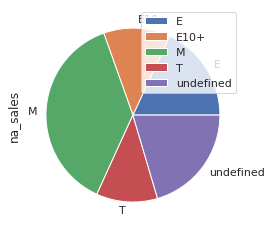

In [51]:
data_rating.plot(kind = 'pie', y = 'na_sales')

Европа:

<AxesSubplot:ylabel='eu_sales'>

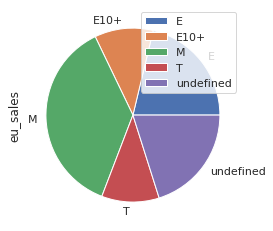

In [52]:
data_rating.plot(kind = 'pie', y = 'eu_sales')

Япония:

<AxesSubplot:ylabel='jp_sales'>

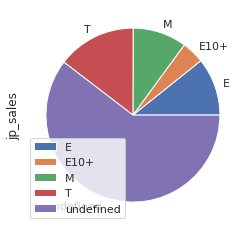

In [53]:
data_rating.plot(kind = 'pie', y = 'jp_sales')

 **Вывод**
1. Большинство игр в Северной Америке и Европе покупают с рейтингами "для всех" и "для взрослых". На примерно одинаковых позициях оказались рейтинги "10+" и "для подростков".
2. Однако в Японии рейтинг "для подростков" занимает одну из ведущих позиций. После следуют "для всех" и "Для взрослых".

**Общий вывод по портретам пользователей**

1. Выявлен Топ-5 платформ с максимальными долями продаж для Северной Америки, Европы и Японии. Для Европы и Северной Америки предпочтения в игровых платформах схожи: PS и Xbox. В Европе также популярна PC.В Японии также популярны платформы серии DS.

2. Выявлен Топ-5 жанров с максимальными долями продаж для Северной Америки, Европы и Японии. Для Европы и Северной Америки: Action, Shooter, Sports, Role-Playing. В Японии помимо Role_Playing, и Action также популярны Fighting и Misc.

3. Проанализированы зависимости уровня продаж игр от рейтинга ESRB в каждом регионе. Для Европы и Северной Америки большинство игр покупают с рейтингами "для взрослых" и "для всех".В данных регионах ориентир идёт на большой охват аудитории ( в играх для всех) и ориентир на более взросылх пользователей. В Японии рейтинг "для подростков" занимает одну из ведущих позиций.

4. Можем предположить, что различия в продажах между Японией остальными регионами по всем рассмотренным параметрам обуславливается обособленностью Японии, отличием менталитета и соответственно другими ориентирами производителей.

# Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Формулируем нулевую и альтернативную гипотезы.

H0: "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC"

H1: "Средняя пользовательская оценка игр на платформе Xbox One не равна средней пользовательской оценке игр на платформе PC"


Определим уровень значимости alpha = 0.05

In [54]:
rating_XOne = data_games.loc[(data_games['platform'] == 'XOne') &
                              (~data_games['user_score'].isna()), 'user_score']   
rating_PC = data_games.loc[(data_games['platform'] == 'PC') &
                              (~data_games['user_score'].isna()), 'user_score']   

results = st.ttest_ind(rating_XOne , rating_PC, equal_var=False) 
alpha = 0.05


print('p-значение:',results.pvalue) 

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


Делаем вывод, что средняя пользовательская оценка игр на платформе Xbox One не равна средней пользовательской оценке игр на платформе PC.

**Cредние пользовательские рейтинги жанров Action  и Sports разные**

Формулируем нулевую и альтернативную гипотезы.

H0: "Средняя пользовательская оценка  жанра Action равна средней пользовательской оценке жанра Sports"

H1: "Средняя пользовательская оценка  жанра Action не равна средней пользовательской оценке жанра Sports"

Определим уровень значимости alpha = 0.05

In [55]:
rating_action = data_games.loc[(data_games['genre'] == 'Action') &
                              (~data_games['user_score'].isna()), 'user_score']  
                               
rating_sports = data_games.loc[(data_games['genre'] == 'Sports') &
                               (~data_games['user_score'].isna()), 'user_score'] 
                                

results = st.ttest_ind(rating_action , rating_sports, equal_var=False) 
alpha = 0.05


print('p-значение:',results.pvalue) 

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Делаем вывод, что средняя пользовательская оценка жанра Action  равна средней пользовательской оценке жанра Sports.

Пояснение: для проверки гипотез был выбран данный критерий всвязи с тем, что мы имеем дело с выборками из двух генеральных совокупностей. 

**Общий вывод по проверке гипотез**
1. Cредняя пользовательская оценка игр на платформе Xbox One не равна средней пользовательской оценке игр на платформе PC

2. Cредняя пользовательская оценка жанра Action  равна средней пользовательской оценке жанра Sports

# Общий вывод

1. Данные изучены, дубликаты не обнаружены. Выявлены проблемы для дальнейшей работы с данными.
2. Обработаны по возможности пропущенные значения, изменены по необходимости типы данных, подсчитаны суммарные продажи во всех регионах и сохранены в новый столбец.
3. Выявили, сколько игр выпускалось за разные годы. Выбрали платформы с наибольшими суммарными продажами. Выявили характерный срок появления новых и исчезновения старых платформ: от 5 до 10 лет.Определили потенциально прибыльные платформы по статистике последнего года.
4. Определили тенденцию зависимости от отзывов критиков: предполагаем, что на них при покупке ориентируются больше всего. 
5. Определили топ жанров:

 Для Европы и Северной Америки: Action, Shooter, Sports, Role-Playing. В Японии помимо Role_Playing, и Action также популярны Fighting и Misc.
6. Проанализировав портреты пользователей разных регионов, делаем вывод, что пользователи из Северной Америки и Европы во многом схожи в своих предпочтениях, а пользователи из Японии имеют немного другой вектор, что может быть обусловлено другим менталитетом. 
7. С помощью проверки гипотез пришли к выводам о том, что средняя пользовательская оценка игр на платформе Xbox One не равна средней пользовательской оценке игр на платформе PC и средняя пользовательская оценка жанра Action равна средней пользовательской оценке жанра Sports. 